In [1]:
from fastai.vision.all import *
import os
import timm
from fastai.vision.widgets import *
import fastai

In [5]:
pip install torch==2.0.1+cu117 torchvision==0.15.2+cu117 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu117/torch-2.0.1%2Bcu117-cp39-cp39-linux_x86_64.whl (1843.9 MB)
  Using cached https://download.pytorch.org/whl/cu117/torchvision-0.15.2%2Bcu117-cp39-cp39-linux_x86_64.whl (6.1 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.7.1+cu110
    Uninstalling torch-1.7.1+cu110:
      Successfully uninstalled torch-1.7.1+cu110
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.8.2+cu110
    Uninstalling torchvision-0.8.2+cu110:
      Successfully uninstalled torchvision-0.8.2+cu110
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 0.7.2 requires torch==1.7.1, but you have torch 2.0.1+cu117 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install --upgrade torch
!pip install --upgrade fastai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 11.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 MB 18.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 19.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 12.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 17.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 36.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━

In [2]:
# Asegúrate de que 'learn' esté cargado con tu modelo
learn = load_learner("Semi_dataset_100/semi_learn_2iter.pkl")

# Especifiquemos la ruta a tu conjunto de datos de testeo
path = Path("dataset_resized_testeo/")  # Asegúrate de reemplazar esto con la ruta correcta








In [3]:
# Obtiene los archivos de imagen en tu conjunto de testeo
tst_files = get_image_files(path)
print(len(tst_files))  # Imprime el número de archivos para verificar

12096


['plano_coronal', 'plano_sagital', 'ruido']

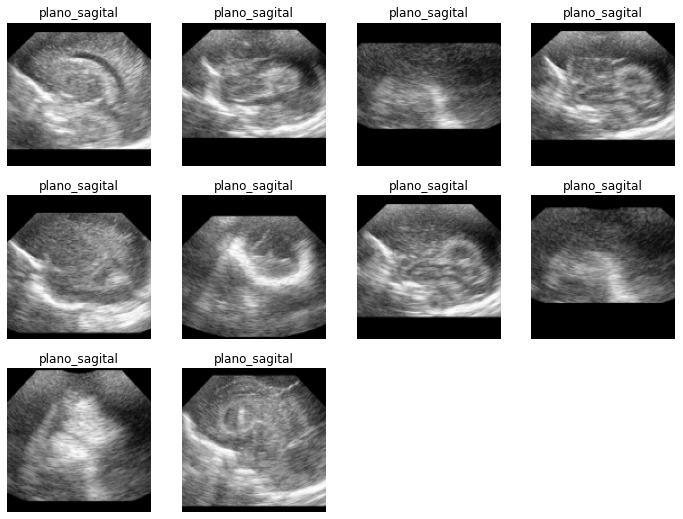

In [4]:
# Crea un DataLoader de testeo a partir de tus archivos de imagen
tst_dl = learn.dls.test_dl(tst_files, with_labels=True)  # Asumiendo que tus datos tienen etiquetas

# Opcional: Visualiza un batch de datos de testeo
tst_dl.show_batch(max_n=10)
tst_dl.vocab

In [5]:
# Obtiene las predicciones y las etiquetas verdaderas
preds, y = learn.get_preds(dl=tst_dl)

# Calcula e imprime la precisión
acc = accuracy(preds, y)
print(f'Accuracy: {acc.item()}')

Accuracy: 0.9389054179191589


In [6]:
# Realiza una validación completa y imprime los resultados
val_results = learn.validate(dl=tst_dl)
print(f'Validation Results: {val_results}')



Validation Results: [0.20058026909828186, 0.9389054179191589, 0.061094578355550766]
